In [1]:
import numpy as np
import nltk
import string
import random
import pandas as pd

In [2]:
f=open("S:/pro/chatbot.txt",'r',errors='ignore')
raw_doc=f.read()
raw_doc = raw_doc.lower()

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Tokenize the text
sent_tokens = nltk.sent_tokenize(raw_doc) 
word_tokens = nltk.word_tokenize(raw_doc)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
sent_tokens[:2]

["this is bnaking chatbot\n\nto open a new account, visit the nearest branch or the bank's official website, provide necessary documents like id proof, address proof, and photographs, and complete the application form.",
 'common types of accounts include savings accounts, current accounts, and fixed deposits.']

In [4]:
word_tokens[:2]


['this', 'is']

In [5]:
# Lemmatizer and helper functions
lemmer = nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))


In [6]:
GREET_INPUTS = ("hello", "hii", "hey","hi","hey there","hii bot","what's up")
GREET_RESPONSES = ["Hi", "Hey", "Hi There","Hello","I am Glad to see you here"]

def greet(sentence):
    for word in sentence.split():
        if word.lower() in GREET_INPUTS:
            return random.choice(GREET_RESPONSES)

In [7]:
# TF-IDF and response generation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [8]:
def response(user_response):
    robo1_response = ''
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx = vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if req_tfidf == 0:
        robo1_response = robo1_response + "I am sorry! I don't understand you."
        return robo1_response
    else:
        robo1_response = robo1_response + sent_tokens[idx]
        return robo1_response

In [9]:
# Chatbot interaction
flag = True
print("CHATBOT: My name is LEO. Let's have a conversation! Also, if you want to exit at any time, just type 'Bye'!")

while flag:
    user_response = input()  # Changed to consistent variable name
    user_response = user_response.lower()
    if user_response != 'bye':
        if user_response in ('thanks', 'thank you'):
            flag = False
            print("LEO: You are welcome...")
        else:
            if greet(user_response) is not None:
                print("LEO: " + greet(user_response))
            else:
                sent_tokens.append(user_response)
                word_tokens = word_tokens + nltk.word_tokenize(user_response)  # Fixed typo
                print("LEO: ", end="")
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag = False
        print("LEO: Goodbye! Take care <3")

CHATBOT: My name is LEO. Let's have a conversation! Also, if you want to exit at any time, just type 'Bye'!


 hii


LEO: Hi


 bye


LEO: Goodbye! Take care <3


In [10]:
pip install deep-translator

Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import nltk
import string
import random
import pandas as pd
from googletrans import Translator

# Load and preprocess chatbot data
f = open("S:/pro/chatbot.txt", 'r', errors='ignore')
raw_doc = f.read()
raw_doc = raw_doc.lower()

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')

# Tokenize the text
sent_tokens = nltk.sent_tokenize(raw_doc)
word_tokens = nltk.word_tokenize(raw_doc)

# Lemmatizer and helper functions
lemmer = nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

# Greeting inputs and responses
GREET_INPUTS = ("hello", "hii", "hey", "hi", "hey there", "hii bot", "what's up")
GREET_RESPONSES = ["Hi", "Hey", "Hi There", "Hello", "I am Glad to see you here"]

def greet(sentence):
    for word in sentence.split():
        if word.lower() in GREET_INPUTS:
            return random.choice(GREET_RESPONSES)

# TF-IDF and response generation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def response(user_response):
    robo1_response = ''
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx = vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if req_tfidf == 0:
        robo1_response = robo1_response + "I am sorry! I don't understand you."
        return robo1_response
    else:
        robo1_response = robo1_response + sent_tokens[idx]
        return robo1_response

# Translator
translator = Translator()

def translate_text(text, src_lang, dest_lang):
    try:
        translated = translator.translate(text, src=src_lang, dest=dest_lang)
        return translated.text
    except ValueError:
        return "Error: Unsupported language code. Please try again with a valid language code."

# Main chatbot interaction
flag = True
print("CHATBOT: My name is LEO. Let's have a conversation! Also, if you want to exit at any time, just type 'Bye'!")

# Supported Indian languages
supported_languages = {
    "en": "English",
    "hi": "Hindi",
    "kn": "Kannada"
}

dest_language = "en"  # Default language is English
while flag:
    user_response = input("You: ")
    if user_response.lower().startswith("lang:"):
        lang_code = user_response.split(":", 1)[1].strip()
        if lang_code in supported_languages:
            dest_language = lang_code
            print(f"LEO: Language changed to {supported_languages[lang_code]}.")
        else:
            print(f"LEO: Unsupported language code. Supported languages are: {', '.join(supported_languages.keys())}")
        continue

    user_response = user_response.lower()

    if user_response != 'bye':
        if user_response in ('thanks', 'thank you'):
            flag = False
            chatbot_response = "You are welcome..."
        else:
            if greet(user_response) is not None:
                chatbot_response = greet(user_response)
            else:
                sent_tokens.append(user_response)
                word_tokens = word_tokens + nltk.word_tokenize(user_response)
                chatbot_response = response(user_response)
                sent_tokens.remove(user_response)

        chatbot_response_translated = translate_text(chatbot_response, "en", dest_language)
        print(f"LEO: {chatbot_response_translated}")

    else:
        flag = False
        chatbot_response = "Goodbye! Take care <3"
        chatbot_response_translated = translate_text(chatbot_response, "en", dest_language)
        print(f"LEO: {chatbot_response_translated}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


CHATBOT: My name is LEO. Let's have a conversation! Also, if you want to exit at any time, just type 'Bye'!


You:  hii


LEO: Hi


You:  en


S:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
S:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


LEO: I am sorry! I don't understand you.


You:  lang:en


LEO: Language changed to English.


You:  lang:kn


LEO: Language changed to Kannada.


You:  bye


LEO: ವಿದಾಯ!ಕಾಳಜಿ ವಹಿಸಿ <3


In [15]:
# Multilingual Support 

In [3]:
import numpy as np
import nltk
import string
import random
import pandas as pd
from googletrans import Translator

# Load and preprocess chatbot data
f = open("S:/pro/chatbot.txt", 'r', errors='ignore')
raw_doc = f.read()
raw_doc = raw_doc.lower()

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')

# Tokenize the text
sent_tokens = nltk.sent_tokenize(raw_doc)
word_tokens = nltk.word_tokenize(raw_doc)

# Lemmatizer and helper functions
lemmer = nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

# Greeting inputs and responses
GREET_INPUTS = ("hello", "hii", "hey", "hi", "hey there", "hii bot", "what's up")
GREET_RESPONSES = ["Hi", "Hey", "Hi There", "Hello", "I am Glad to see you here"]

def greet(sentence):
    for word in sentence.split():
        if word.lower() in GREET_INPUTS:
            return random.choice(GREET_RESPONSES)

# TF-IDF and response generation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def response(user_response):
    robo1_response = ''
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx = vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if req_tfidf == 0:
        robo1_response = robo1_response + "I am sorry! I don't understand you."
        return robo1_response
    else:
        robo1_response = robo1_response + sent_tokens[idx]
        return robo1_response

# Translator
translator = Translator()

def translate_text(text, src_lang, dest_lang):
    try:
        translated = translator.translate(text, src=src_lang, dest=dest_lang)
        return translated.text
    except ValueError:
        return "Error: Unsupported language code. Please try again with a valid language code."

# Main chatbot interaction
print("LEO: My name is LEO. Let's have a conversation! Also, if you want to exit at any time, just type 'Bye'!")

# Supported Indian languages
supported_languages = {
    "en": "English",
    "hi": "Hindi",
    "kn": "Kannada"
}

# Ask user for preferred language at the start of the conversation
print("LEO: Supported languages are:")
for code, language in supported_languages.items():
    print(f"    {language}: {code}")
user_language = input("LEO: Please select your language code: ").strip()

if user_language in supported_languages:
    dest_language = user_language
    print(f"LEO: Language set to {supported_languages[user_language]} ({user_language}).")
else:
    print("LEO: Unsupported language code. Exiting.")
    exit()

flag = True
while flag:
    user_response = input("You: ")
    user_response = user_response.lower()

    if user_response != 'bye':
        if user_response in ('thanks', 'thank you'):
            flag = False
            chatbot_response = "You are welcome..."
        else:
            if greet(user_response) is not None:
                chatbot_response = greet(user_response)
            else:
                sent_tokens.append(user_response)
                word_tokens = word_tokens + nltk.word_tokenize(user_response)
                chatbot_response = response(user_response)
                sent_tokens.remove(user_response)

        chatbot_response_translated = translate_text(chatbot_response, "en", dest_language)
        print(f"LEO: {chatbot_response_translated}")

    else:
        flag = False
        chatbot_response = "Goodbye! Take care <3"
        chatbot_response_translated = translate_text(chatbot_response, "en", dest_language)
        print(f"LEO: {chatbot_response_translated}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LEO: My name is LEO. Let's have a conversation! Also, if you want to exit at any time, just type 'Bye'!
LEO: Supported languages are:
    English: en
    Hindi: hi
    Kannada: kn


LEO: Please select your language code:  kn


LEO: Language set to Kannada (kn).


You:  hii


LEO: ನಮಸ್ತೆ


You:  bye


LEO: ವಿದಾಯ!ಕಾಳಜಿ ವಹಿಸಿ <3


In [14]:
# Multilingual Support with number

In [6]:
import numpy as np
import nltk
import string
import random
import pandas as pd
from googletrans import Translator

# Load and preprocess chatbot data
f = open("S:/pro/chatbot.txt", 'r', errors='ignore')
raw_doc = f.read()
raw_doc = raw_doc.lower()

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')

# Tokenize the text
sent_tokens = nltk.sent_tokenize(raw_doc)
word_tokens = nltk.word_tokenize(raw_doc)

# Lemmatizer and helper functions
lemmer = nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

# Greeting inputs and responses
GREET_INPUTS = ("hello", "hii", "hey", "hi", "hey there", "hii bot", "what's up")
GREET_RESPONSES = ["Hi", "Hey", "Hi There", "Hello", "I am Glad to see you here"]

def greet(sentence):
    for word in sentence.split():
        if word.lower() in GREET_INPUTS:
            return random.choice(GREET_RESPONSES)

# TF-IDF and response generation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def response(user_response):
    robo1_response = ''
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx = vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if req_tfidf == 0:
        robo1_response = robo1_response + "I am sorry! I don't understand you."
        return robo1_response
    else:
        robo1_response = robo1_response + sent_tokens[idx]
        return robo1_response

# Translator
translator = Translator()

def translate_text(text, src_lang, dest_lang):
    try:
        translated = translator.translate(text, src=src_lang, dest=dest_lang)
        return translated.text
    except ValueError:
        return "Error: Unsupported language code. Please try again with a valid language code."

# Main chatbot interaction
print("LEO: My name is LEO. Let's have a conversation! Also, if you want to exit at any time, just type 'Bye'!")

# Supported Indian languages
supported_languages = {
    "en": "English",
    "hi": "Hindi",
    "kn": "Kannada"
}

# Ask user for preferred language at the start of the conversation
print("LEO: Please select your language:")
for idx, (code, language) in enumerate(supported_languages.items(), start=1):
    print(f"{idx}. {language} ({code})")

while True:
    try:
        choice = int(input("LEO: Enter the number corresponding to your choice: "))
        if 1 <= choice <= len(supported_languages):
            dest_language = list(supported_languages.keys())[choice - 1]
            print(f"LEO: Language set to {supported_languages[dest_language]} ({dest_language}).")
            break
        else:
            print("LEO: Invalid choice. Please try again.")
    except ValueError:
        print("LEO: Please enter a valid number.")

flag = True
while flag:
    user_response = input("You: ")
    user_response = user_response.lower()

    if user_response != 'bye':
        if user_response in ('thanks', 'thank you'):
            flag = False
            chatbot_response = "You are welcome..."
        else:
            if greet(user_response) is not None:
                chatbot_response = greet(user_response)
            else:
                sent_tokens.append(user_response)
                word_tokens = word_tokens + nltk.word_tokenize(user_response)
                chatbot_response = response(user_response)
                sent_tokens.remove(user_response)

        chatbot_response_translated = translate_text(chatbot_response, "en", dest_language)
        print(f"LEO: {chatbot_response_translated}")

    else:
        flag = False
        chatbot_response = "Goodbye! Take care <3"
        chatbot_response_translated = translate_text(chatbot_response, "en", dest_language)
        print(f"LEO: {chatbot_response_translated}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LEO: My name is LEO. Let's have a conversation! Also, if you want to exit at any time, just type 'Bye'!
LEO: Please select your language:
1. English (en)
2. Hindi (hi)
3. Kannada (kn)


LEO: Enter the number corresponding to your choice:  3


LEO: Language set to Kannada (kn).


You:  hii


LEO: ಹೇ


You:  bye


LEO: ವಿದಾಯ!ಕಾಳಜಿ ವಹಿಸಿ <3


In [13]:
# Voice enabled 

In [8]:
pip install SpeechRecognition pyttsx3

   ---------------------------------------- 0.0/32.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/32.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/32.8 MB 1.7 MB/s eta 0:00:20
   ---------------------------------------- 0.1/32.8 MB 1.1 MB/s eta 0:00:31
   ---------------------------------------- 0.2/32.8 MB 1.3 MB/s eta 0:00:25
   ---------------------------------------- 0.2/32.8 MB 1.1 MB/s eta 0:00:31
   ---------------------------------------- 0.3/32.8 MB 1.1 MB/s eta 0:00:30
   ---------------------------------------- 0.4/32.8 MB 1.2 MB/s eta 0:00:27
    --------------------------------------- 0.5/32.8 MB 1.3 MB/s eta 0:00:26
    --------------------------------------- 0.6/32.8 MB 1.4 MB/s eta 0:00:24
    --------------------------------------- 0.6/32.8 MB 1.4 MB/s eta 0:00:24
    --------------------------------------- 0.6/32.8 MB 1.4 MB/s eta 0:00:24
    --------------------------------------- 0.7/32.8 MB 1.3 MB/s eta 0:00:26
    ---------

In [10]:
pip install pyaudio

   ---------------------------------------- 0.0/164.1 kB ? eta -:--:--
   -- ------------------------------------- 10.2/164.1 kB ? eta -:--:--
   ------- ------------------------------- 30.7/164.1 kB 325.1 kB/s eta 0:00:01
   -------------- ------------------------ 61.4/164.1 kB 465.5 kB/s eta 0:00:01
   --------------------- ----------------- 92.2/164.1 kB 521.8 kB/s eta 0:00:01
   --------------------------------- ---- 143.4/164.1 kB 652.5 kB/s eta 0:00:01
   -------------------------------------- 164.1/164.1 kB 615.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import nltk
import string
import random
import pandas as pd
from googletrans import Translator
import pyttsx3
import speech_recognition as sr

# Initialize speech engine
engine = pyttsx3.init()

# Load and preprocess chatbot data
f = open("S:/pro/chatbot.txt", 'r', errors='ignore')
raw_doc = f.read()
raw_doc = raw_doc.lower()

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')

# Tokenize the text
sent_tokens = nltk.sent_tokenize(raw_doc)
word_tokens = nltk.word_tokenize(raw_doc)

# Lemmatizer and helper functions
lemmer = nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

# Greeting inputs and responses
GREET_INPUTS = ("hello", "hii", "hey", "hi", "hey there", "hii bot", "what's up")
GREET_RESPONSES = ["Hi", "Hey", "Hi There", "Hello", "I am Glad to see you here"]

def greet(sentence):
    for word in sentence.split():
        if word.lower() in GREET_INPUTS:
            return random.choice(GREET_RESPONSES)

# TF-IDF and response generation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def response(user_response):
    robo1_response = ''
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx = vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if req_tfidf == 0:
        robo1_response = robo1_response + "I am sorry! I don't understand you."
        return robo1_response
    else:
        robo1_response = robo1_response + sent_tokens[idx]
        return robo1_response

# Translator
translator = Translator()

def translate_text(text, src_lang, dest_lang):
    try:
        translated = translator.translate(text, src=src_lang, dest=dest_lang)
        return translated.text
    except ValueError:
        return "Error: Unsupported language code. Please try again with a valid language code."

# Main chatbot interaction
print("LEO: My name is LEO. Let's have a conversation! Also, if you want to exit at any time, just type 'Bye'!")

# Supported Indian languages
supported_languages = {
    "en": "English",
    "hi": "Hindi",
    "kn": "Kannada"
}

# Ask user for preferred language at the start of the conversation
print("LEO: Please select your language:")
for idx, (code, language) in enumerate(supported_languages.items(), start=1):
    print(f"{idx}. {language} ({code})")

while True:
    try:
        choice = int(input("LEO: Enter the number corresponding to your choice: "))
        if 1 <= choice <= len(supported_languages):
            dest_language = list(supported_languages.keys())[choice - 1]
            print(f"LEO: Language set to {supported_languages[dest_language]} ({dest_language}).")
            break
        else:
            print("LEO: Invalid choice. Please try again.")
    except ValueError:
        print("LEO: Please enter a valid number.")

flag = True
while flag:
    # Voice input
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("You: Please speak now.")
        audio = recognizer.listen(source)

    try:
        user_response = recognizer.recognize_google(audio)
        print(f"You: {user_response}")
        user_response = user_response.lower()

        if user_response != 'bye':
            if user_response in ('thanks', 'thank you'):
                flag = False
                chatbot_response = "You are welcome..."
            else:
                if greet(user_response) is not None:
                    chatbot_response = greet(user_response)
                else:
                    sent_tokens.append(user_response)
                    word_tokens = word_tokens + nltk.word_tokenize(user_response)
                    chatbot_response = response(user_response)
                    sent_tokens.remove(user_response)

            chatbot_response_translated = translate_text(chatbot_response, "en", dest_language)
            print(f"LEO: {chatbot_response_translated}")
            
            # Voice output
            engine.say(chatbot_response_translated)
            engine.runAndWait()

        else:
            flag = False
            chatbot_response = "Goodbye! Take care <3"
            chatbot_response_translated = translate_text(chatbot_response, "en", dest_language)
            print(f"LEO: {chatbot_response_translated}")
            engine.say(chatbot_response_translated)
            engine.runAndWait()

    except sr.UnknownValueError:
        print("LEO: Sorry, I didn't understand that.")
    except sr.RequestError:
        print("LEO: Sorry, the service is down.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LEO: My name is LEO. Let's have a conversation! Also, if you want to exit at any time, just type 'Bye'!
LEO: Please select your language:
1. English (en)
2. Hindi (hi)
3. Kannada (kn)


LEO: Enter the number corresponding to your choice:  3


LEO: Language set to Kannada (kn).
You: Please speak now.
You: namaste
LEO: ಕ್ಷಮಿಸಿ!ನಾನು ನಿಮಗೆ ಅರ್ಥವಾಗುತ್ತಿಲ್ಲ.
You: Please speak now.
LEO: Sorry, I didn't understand that.
You: Please speak now.
You: Bank
LEO: ಖಾತೆ ಪ್ರಕಾರ ಮತ್ತು ಬ್ಯಾಂಕ್ ನೀತಿಯಿಂದ ಕನಿಷ್ಠ ಸಮತೋಲನ ಅವಶ್ಯಕತೆಗಳು ಬದಲಾಗುತ್ತವೆ;ನಿರ್ದಿಷ್ಟ ವಿವರಗಳಿಗಾಗಿ ನಿಮ್ಮ ಬ್ಯಾಂಕ್ ಅನ್ನು ಸಂಪರ್ಕಿಸಿ.
You: Please speak now.
LEO: Sorry, I didn't understand that.
You: Please speak now.
You: Hosa Bank khate
LEO: ಖಾತೆ ಪ್ರಕಾರ ಮತ್ತು ಬ್ಯಾಂಕ್ ನೀತಿಯಿಂದ ಕನಿಷ್ಠ ಸಮತೋಲನ ಅವಶ್ಯಕತೆಗಳು ಬದಲಾಗುತ್ತವೆ;ನಿರ್ದಿಷ್ಟ ವಿವರಗಳಿಗಾಗಿ ನಿಮ್ಮ ಬ್ಯಾಂಕ್ ಅನ್ನು ಸಂಪರ್ಕಿಸಿ.
You: Please speak now.
LEO: Sorry, I didn't understand that.
You: Please speak now.
You: Airtel customer Bank
LEO: ಖಾತೆ ಪ್ರಕಾರ ಮತ್ತು ಬ್ಯಾಂಕ್ ನೀತಿಯಿಂದ ಕನಿಷ್ಠ ಸಮತೋಲನ ಅವಶ್ಯಕತೆಗಳು ಬದಲಾಗುತ್ತವೆ;ನಿರ್ದಿಷ್ಟ ವಿವರಗಳಿಗಾಗಿ ನಿಮ್ಮ ಬ್ಯಾಂಕ್ ಅನ್ನು ಸಂಪರ್ಕಿಸಿ.
You: Please speak now.
LEO: Sorry, I didn't understand that.
You: Please speak now.
LEO: Sorry, I didn't understand that.
You: Please speak now.
You: bye
LEO: ವಿದಾಯ!ಕಾಳಜಿ ವಹಿಸಿ <3


In [16]:
#voice enabled with multililngual support

In [17]:
pip install gTTS

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import nltk
import string
import random
import pandas as pd
from googletrans import Translator
import pyttsx3
import speech_recognition as sr
from gtts import gTTS
import os

# Initialize speech engine (for languages supported by pyttsx3)
engine = pyttsx3.init()

# Load and preprocess chatbot data
f = open("S:/pro/chatbot.txt", 'r', errors='ignore')
raw_doc = f.read()
raw_doc = raw_doc.lower()

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')

# Tokenize the text
sent_tokens = nltk.sent_tokenize(raw_doc)
word_tokens = nltk.word_tokenize(raw_doc)

# Lemmatizer and helper functions
lemmer = nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

# Greeting inputs and responses
GREET_INPUTS = ("hello", "hii", "hey", "hi", "hey there", "hii bot", "what's up")
GREET_RESPONSES = ["Hi", "Hey", "Hi There", "Hello", "I am Glad to see you here"]

def greet(sentence):
    for word in sentence.split():
        if word.lower() in GREET_INPUTS:
            return random.choice(GREET_RESPONSES)

# TF-IDF and response generation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def response(user_response):
    robo1_response = ''
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx = vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if req_tfidf == 0:
        robo1_response = robo1_response + "I am sorry! I don't understand you."
        return robo1_response
    else:
        robo1_response = robo1_response + sent_tokens[idx]
        return robo1_response

# Translator
translator = Translator()

def translate_text(text, src_lang, dest_lang):
    try:
        translated = translator.translate(text, src=src_lang, dest=dest_lang)
        return translated.text
    except ValueError:
        return "Error: Unsupported language code. Please try again with a valid language code."

# Function to speak the response in the selected language
def speak_response(response_text, language):
    if language == 'en':
        engine.say(response_text)
        engine.runAndWait()
    else:
        tts = gTTS(text=response_text, lang=language)
        tts.save("response.mp3")
        os.system("start response.mp3")  # This works on Windows; modify for other OS

# Main chatbot interaction
print("LEO: My name is LEO. Let's have a conversation! Also, if you want to exit at any time, just type 'Bye'!")

# Supported Indian languages
supported_languages = {
    "en": "English",
    "hi": "Hindi",
    "kn": "Kannada"
}

# Ask user for preferred language at the start of the conversation
print("LEO: Please select your language:")
for idx, (code, language) in enumerate(supported_languages.items(), start=1):
    print(f"{idx}. {language} ({code})")

while True:
    try:
        choice = int(input("LEO: Enter the number corresponding to your choice: "))
        if 1 <= choice <= len(supported_languages):
            dest_language = list(supported_languages.keys())[choice - 1]
            print(f"LEO: Language set to {supported_languages[dest_language]} ({dest_language}).")
            break
        else:
            print("LEO: Invalid choice. Please try again.")
    except ValueError:
        print("LEO: Please enter a valid number.")

flag = True
while flag:
    # Voice input
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print(f"You: Please speak now in {supported_languages[dest_language]}.")
        audio = recognizer.listen(source)

    try:
        user_response = recognizer.recognize_google(audio, language=dest_language + "-IN")
        print(f"You: {user_response}")
        user_response = user_response.lower()

        if user_response != 'bye':
            if user_response in ('thanks', 'thank you'):
                flag = False
                chatbot_response = "You are welcome..."
            else:
                if greet(user_response) is not None:
                    chatbot_response = greet(user_response)
                else:
                    sent_tokens.append(user_response)
                    word_tokens = word_tokens + nltk.word_tokenize(user_response)
                    chatbot_response = response(user_response)
                    sent_tokens.remove(user_response)

            chatbot_response_translated = translate_text(chatbot_response, "en", dest_language)
            print(f"LEO: {chatbot_response_translated}")
            
            # Speak response in selected language
            speak_response(chatbot_response_translated, dest_language)

        else:
            flag = False
            chatbot_response = "Goodbye! Take care <3"
            chatbot_response_translated = translate_text(chatbot_response, "en", dest_language)
            print(f"LEO: {chatbot_response_translated}")
            speak_response(chatbot_response_translated, dest_language)

    except sr.UnknownValueError:
        print("LEO: Sorry, I didn't understand that.")
    except sr.RequestError:
        print("LEO: Sorry, the service is down.")


In [1]:
# Both multilingual and voice enebled functions.

In [2]:
import numpy as np
import nltk
import string
import random
import pyttsx3
import speech_recognition as sr
from googletrans import Translator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Initialize speech engine
engine = pyttsx3.init()

# Load and preprocess chatbot data
f = open("S:/pro/chatbot.txt", 'r', errors='ignore')
raw_doc = f.read().lower()

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')

sent_tokens = nltk.sent_tokenize(raw_doc)
word_tokens = nltk.word_tokenize(raw_doc)

lemmer = nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(dict((ord(punct), None) for punct in string.punctuation))))

# Greetings
GREET_INPUTS = ("hello", "hii", "hey", "hi", "hey there", "hii bot", "what's up")
GREET_RESPONSES = ["Hi", "Hey", "Hi There", "Hello", "I am Glad to see you here"]

def greet(sentence):
    for word in sentence.split():
        if word.lower() in GREET_INPUTS:
            return random.choice(GREET_RESPONSES)

# Response generation
def response(user_response):
    robo1_response = ''
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx = vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if req_tfidf == 0:
        return "I am sorry! I don't understand you."
    else:
        return sent_tokens[idx]

# Translation
translator = Translator()

def translate_text(text, src_lang, dest_lang):
    try:
        return translator.translate(text, src=src_lang, dest=dest_lang).text
    except ValueError:
        return "Error: Unsupported language code."

# Supported languages
supported_languages = {"en": "English", "hi": "Hindi", "kn": "Kannada"}

# Start chatbot
print("LEO: My name is LEO. Let's have a conversation! Type 'Bye' to exit.")
print("LEO: Please select your language:")
for idx, (code, language) in enumerate(supported_languages.items(), start=1):
    print(f"{idx}. {language} ({code})")

while True:
    try:
        language_choice = int(input("LEO: Enter the number for your preferred language: "))
        if 1 <= language_choice <= len(supported_languages):
            dest_language = list(supported_languages.keys())[language_choice - 1]
            print(f"LEO: Language set to {supported_languages[dest_language]} ({dest_language}).")
            break
        else:
            print("LEO: Invalid choice. Please try again.")
    except ValueError:
        print("LEO: Enter a valid number.")

print("LEO: Do you want voice assistance or text-based? (Enter 'V' for voice or 'T' for text)")
mode = input("You: ").strip().upper()

if mode == 'V':
    print("LEO: You have selected Voice mode.")
elif mode == 'T':
    print("LEO: You have selected Text mode.")
else:
    print("LEO: Invalid selection. Please restart and choose 'V' for voice or 'T' for text.")
    exit()

flag = True
while flag:
    if mode == 'V':
        recognizer = sr.Recognizer()
        with sr.Microphone() as source:
            print("You: Please speak now.")
            audio = recognizer.listen(source)
        try:
            user_response = recognizer.recognize_google(audio).lower()
        except sr.UnknownValueError:
            print("LEO: Sorry, I didn't catch that.")
            continue
        except sr.RequestError:
            print("LEO: Service is down.")
            continue
    elif mode == 'T':
        user_response = input("You: ").lower()

    if user_response == 'bye':
        chatbot_response = "Goodbye! Take care."
        chatbot_response_translated = translate_text(chatbot_response, "en", dest_language)
        print(f"LEO: {chatbot_response_translated}")
        if mode == 'V':
            engine.say(chatbot_response_translated)
            engine.runAndWait()
        flag = False
    elif user_response in ('thanks', 'thank you'):
        chatbot_response = "You're welcome!"
        chatbot_response_translated = translate_text(chatbot_response, "en", dest_language)
        print(f"LEO: {chatbot_response_translated}")
        if mode == 'V':
            engine.say(chatbot_response_translated)
            engine.runAndWait()
    else:
        if greet(user_response) is not None:
            chatbot_response = greet(user_response)
        else:
            sent_tokens.append(user_response)
            word_tokens.extend(nltk.word_tokenize(user_response))
            chatbot_response = response(user_response)
            sent_tokens.remove(user_response)

        chatbot_response_translated = translate_text(chatbot_response, "en", dest_language)
        print(f"LEO: {chatbot_response_translated}")
        if mode == 'V':
            engine.say(chatbot_response_translated)
            engine.runAndWait()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LEO: My name is LEO. Let's have a conversation! Type 'Bye' to exit.
LEO: Please select your language:
1. English (en)
2. Hindi (hi)
3. Kannada (kn)


LEO: Enter the number for your preferred language:  1


LEO: Language set to English (en).
LEO: Do you want voice assistance or text-based? (Enter 'V' for voice or 'T' for text)


You:  T


LEO: You have selected Text mode.


You:  How can I check my account balance


LEO: "how can i check my account balance":
"you can check your account balance through multiple methods, including internet banking, mobile banking apps, sms banking, or by visiting the nearest atm if you prefer a personalized approach, you can also visit the branch or call customer service to inquire about your balance."


You:  What should I do if I forget my account password


LEO: "what should i do if i forget my account password": "if you forget your internet or mobile banking password, you can reset it by clicking on the "forgot password" option available on the login page follow the prompts to verify your identity, and you will be able to create a new password for further assistance, you can contact our customer support team."


You:  bye


LEO: Goodbye! Take care.


In [4]:
#best code

In [5]:
import numpy as np
import nltk
import string
import random
import pyttsx3
import speech_recognition as sr
from googletrans import Translator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Initialize speech engine
engine = pyttsx3.init()

# Load and preprocess chatbot data
f = open("S:/pro/chatbot.txt", 'r', errors='ignore')
raw_doc = f.read().lower()

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')

sent_tokens = nltk.sent_tokenize(raw_doc)
word_tokens = nltk.word_tokenize(raw_doc)

lemmer = nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(dict((ord(punct), None) for punct in string.punctuation))))

# Greetings
GREET_INPUTS = ("hello", "hii", "hey", "hi", "hey there", "hii bot", "what's up")
GREET_RESPONSES = ["Hi", "Hey", "Hi There", "Hello", "I am Glad to see you here"]

def greet(sentence):
    for word in sentence.split():
        if word.lower() in GREET_INPUTS:
            return random.choice(GREET_RESPONSES)

# Response generation
def response(user_response):
    robo1_response = ''
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    # Include user_response in TF-IDF
    tfidf = TfidfVec.fit_transform(sent_tokens + [user_response])  # Added user_response here
    vals = cosine_similarity(tfidf[-1], tfidf[:-1])  # Comparing with all sentences, not including the user response
    idx = vals.argsort()[0][-2]  # Taking the second most similar sentence
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if req_tfidf == 0:
        return "I am sorry! I don't understand you."
    else:
        return sent_tokens[idx]
    print(f"User Response: {user_response}")
    print(f"Similarity Scores: {vals.flatten()}")

# Translation
translator = Translator()

def translate_text(text, src_lang, dest_lang):
    try:
        return translator.translate(text, src=src_lang, dest=dest_lang).text
    except ValueError:
        return "Error: Unsupported language code."

# Supported languages
supported_languages = {"en": "English", "hi": "Hindi", "kn": "Kannada"}

# Start chatbot
print("LEO: My name is LEO. Let's have a conversation! Type 'Bye' to exit.")
print("LEO: Please select your language:")
for idx, (code, language) in enumerate(supported_languages.items(), start=1):
    print(f"{idx}. {language} ({code})")

while True:
    try:
        language_choice = int(input("LEO: Enter the number for your preferred language: "))
        if 1 <= language_choice <= len(supported_languages):
            dest_language = list(supported_languages.keys())[language_choice - 1]
            print(f"LEO: Language set to {supported_languages[dest_language]} ({dest_language}).")
            break
        else:
            print("LEO: Invalid choice. Please try again.")
    except ValueError:
        print("LEO: Enter a valid number.")

print("LEO: Do you want voice assistance or text-based? (Enter 'V' for voice or 'T' for text)")
mode = input("You: ").strip().upper()

if mode == 'V':
    print("LEO: You have selected Voice mode.")
elif mode == 'T':
    print("LEO: You have selected Text mode.")
else:
    print("LEO: Invalid selection. Please restart and choose 'V' for voice or 'T' for text.")
    exit()

flag = True
while flag:
    if mode == 'V':
        recognizer = sr.Recognizer()
        with sr.Microphone() as source:
            print("You: Please speak now.")
            audio = recognizer.listen(source)
        try:
            user_response = recognizer.recognize_google(audio).lower()
        except sr.UnknownValueError:
            print("LEO: Sorry, I didn't catch that.")
            continue
        except sr.RequestError:
            print("LEO: Service is down.")
            continue
    elif mode == 'T':
        user_response = input("You: ").lower()

    if user_response == 'bye':
        chatbot_response = "Goodbye! Take care."
        chatbot_response_translated = translate_text(chatbot_response, "en", dest_language)
        print(f"LEO: {chatbot_response_translated}")
        if mode == 'V':
            engine.say(chatbot_response_translated)
            engine.runAndWait()
        flag = False
    elif user_response in ('thanks', 'thank you'):
        chatbot_response = "You're welcome!"
        chatbot_response_translated = translate_text(chatbot_response, "en", dest_language)
        print(f"LEO: {chatbot_response_translated}")
        if mode == 'V':
            engine.say(chatbot_response_translated)
            engine.runAndWait()
    else:
        if greet(user_response) is not None:
            chatbot_response = greet(user_response)
        else:
            sent_tokens.append(user_response)
            word_tokens.extend(nltk.word_tokenize(user_response))
            chatbot_response = response(user_response)
            sent_tokens.remove(user_response)

        chatbot_response_translated = translate_text(chatbot_response, "en", dest_language)
        print(f"LEO: {chatbot_response_translated}")
        if mode == 'V':
            engine.say(chatbot_response_translated)
            engine.runAndWait()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LEO: My name is LEO. Let's have a conversation! Type 'Bye' to exit.
LEO: Please select your language:
1. English (en)
2. Hindi (hi)
3. Kannada (kn)


LEO: Enter the number for your preferred language:  1


LEO: Language set to English (en).
LEO: Do you want voice assistance or text-based? (Enter 'V' for voice or 'T' for text)


You:  T


LEO: You have selected Text mode.


You:  hii


LEO: Hi There


You:  How can I check my account balance


LEO: "how can i check my account balance":
"you can check your account balance through multiple methods, including internet banking, mobile banking apps, sms banking, or by visiting the nearest atm if you prefer a personalized approach, you can also visit the branch or call customer service to inquire about your balance."


You:  bye


LEO: Goodbye! Take care.


In [2]:
#Present Code

In [1]:
import numpy as np
import nltk
import string
import random
import pyttsx3
import speech_recognition as sr
from googletrans import Translator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Initialize speech engine
engine = pyttsx3.init()

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')

lemmer = nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(dict((ord(punct), None) for punct in string.punctuation))))

# Greetings
GREET_INPUTS = ("hello", "hii", "hey", "hi", "hey there", "hii bot", "what's up")
GREET_RESPONSES = ["Hi", "Hey", "Hi There", "Hello", "I am Glad to see you here"]

def greet(sentence):
    for word in sentence.split():
        if word.lower() in GREET_INPUTS:
            return random.choice(GREET_RESPONSES)

# Load the FAQ corpus
def load_corpus(file_path):
    """Load and parse the FAQ corpus from a text file."""
    with open(file_path, 'r', encoding='utf-8') as file:
        data = file.read().strip().split('\n\n')  # Split by blank lines

    corpus = []
    for entry in data:
        if entry.startswith("Q:") and "A:" in entry:
            question = entry.split('\n')[0][3:].strip()  # Extract question
            answer = entry.split('\n')[1][3:].strip()  # Extract answer
            corpus.append((question, answer))
    return corpus

faq_corpus = load_corpus("S:/pro/chatbot.txt")

def find_best_match(user_query, corpus):
    """Find the best match for a user query in the FAQ corpus."""
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    questions = [q for q, _ in corpus]
    tfidf = TfidfVec.fit_transform(questions + [user_query])  # Add user_query
    vals = cosine_similarity(tfidf[-1], tfidf[:-1])  # Compare user_query to questions
    idx = vals.argsort()[0][-1]  # Best match index
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-1]
    if req_tfidf == 0:
        return "I am sorry! I don't understand you."
    else:
        return corpus[idx][1]  # Return the answer for the best-matching question

# Translation
translator = Translator()

def translate_text(text, src_lang, dest_lang):
    try:
        return translator.translate(text, src=src_lang, dest=dest_lang).text
    except ValueError:
        return "Error: Unsupported language code."

# Supported languages
supported_languages = {"en": "English", "hi": "Hindi", "kn": "Kannada"}

# Start chatbot
print("LEO: My name is LEO. Let's have a conversation! Type 'Bye' to exit.")
print("LEO: Please select your language:")
for idx, (code, language) in enumerate(supported_languages.items(), start=1):
    print(f"{idx}. {language} ({code})")

while True:
    try:
        language_choice = int(input("LEO: Enter the number for your preferred language: "))
        if 1 <= language_choice <= len(supported_languages):
            dest_language = list(supported_languages.keys())[language_choice - 1]
            print(f"LEO: Language set to {supported_languages[dest_language]} ({dest_language}).")
            break
        else:
            print("LEO: Invalid choice. Please try again.")
    except ValueError:
        print("LEO: Enter a valid number.")

print("LEO: Do you want voice assistance or text-based? (Enter 'V' for voice or 'T' for text)")
mode = input("You: ").strip().upper()

if mode == 'V':
    print("LEO: You have selected Voice mode.")
elif mode == 'T':
    print("LEO: You have selected Text mode.")
else:
    print("LEO: Invalid selection. Please restart and choose 'V' for voice or 'T' for text.")
    exit()

flag = True
while flag:
    if mode == 'V':
        recognizer = sr.Recognizer()
        with sr.Microphone() as source:
            print("You: Please speak now.")
            audio = recognizer.listen(source)
        try:
            user_response = recognizer.recognize_google(audio).lower()
        except sr.UnknownValueError:
            print("LEO: Sorry, I didn't catch that.")
            continue
        except sr.RequestError:
            print("LEO: Service is down.")
            continue
    elif mode == 'T':
        user_response = input("You: ").lower()

    if user_response == 'bye':
        chatbot_response = "Goodbye! Take care."
        chatbot_response_translated = translate_text(chatbot_response, "en", dest_language)
        print(f"LEO: {chatbot_response_translated}")
        if mode == 'V':
            engine.say(chatbot_response_translated)
            engine.runAndWait()
        flag = False
    elif user_response in ('thanks', 'thank you'):
        chatbot_response = "You're welcome!"
        chatbot_response_translated = translate_text(chatbot_response, "en", dest_language)
        print(f"LEO: {chatbot_response_translated}")
        if mode == 'V':
            engine.say(chatbot_response_translated)
            engine.runAndWait()
    else:
        if greet(user_response) is not None:
            chatbot_response = greet(user_response)
        else:
            chatbot_response = find_best_match(user_response, faq_corpus)

        chatbot_response_translated = translate_text(chatbot_response, "en", dest_language)
        print(f"LEO: {chatbot_response_translated}")
        if mode == 'V':
            engine.say(chatbot_response_translated)
            engine.runAndWait()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LEO: My name is LEO. Let's have a conversation! Type 'Bye' to exit.
LEO: Please select your language:
1. English (en)
2. Hindi (hi)
3. Kannada (kn)


LEO: Enter the number for your preferred language:  bye


LEO: Enter a valid number.


LEO: Enter the number for your preferred language:  1


LEO: Language set to English (en).
LEO: Do you want voice assistance or text-based? (Enter 'V' for voice or 'T' for text)


You:  T


LEO: You have selected Text mode.


You:  bye


LEO: Goodbye! Take care.


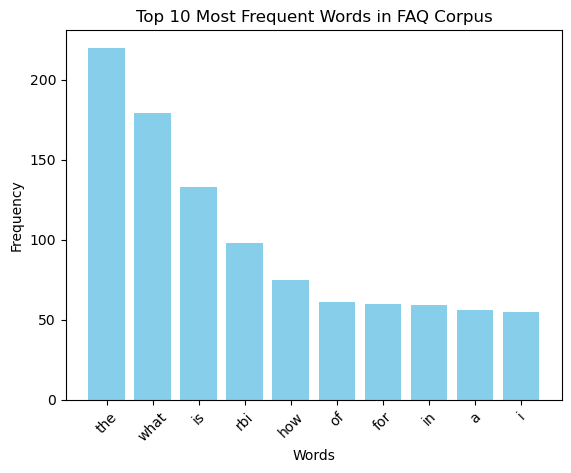

In [2]:
from collections import Counter
import matplotlib.pyplot as plt

def plot_word_frequency(corpus):
    all_text = " ".join([q for q, a in corpus])
    tokens = nltk.word_tokenize(all_text.lower())
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation and numbers
    frequency = Counter(tokens)
    most_common = frequency.most_common(10)  # Top 10 most common words

    words, counts = zip(*most_common)
    plt.bar(words, counts, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 10 Most Frequent Words in FAQ Corpus')
    plt.xticks(rotation=45)
    plt.show()

plot_word_frequency(faq_corpus)


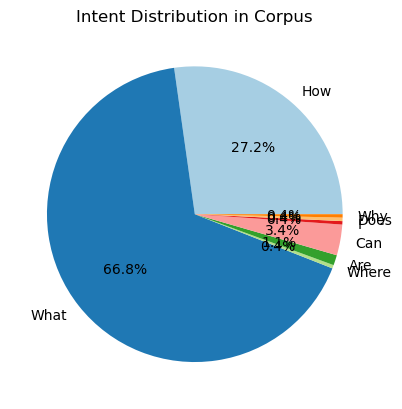

In [3]:
def plot_intent_distribution(corpus):
    intents = [q.split(' ')[0] for q, _ in corpus]  # Assuming first word represents intent
    frequency = Counter(intents)
    
    plt.pie(frequency.values(), labels=frequency.keys(), autopct='%1.1f%%', colors=plt.cm.Paired.colors)
    plt.title('Intent Distribution in Corpus')
    plt.show()

plot_intent_distribution(faq_corpus)


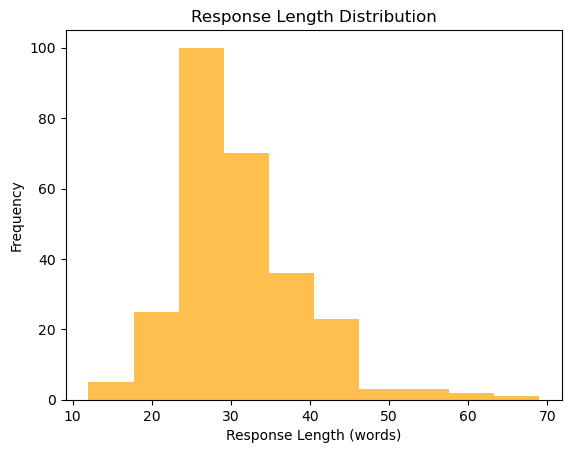

In [4]:
def plot_response_length_distribution(corpus):
    response_lengths = [len(a.split()) for _, a in corpus]
    plt.hist(response_lengths, bins=10, color='orange', alpha=0.7)
    plt.xlabel('Response Length (words)')
    plt.ylabel('Frequency')
    plt.title('Response Length Distribution')
    plt.show()

plot_response_length_distribution(faq_corpus)


S:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
S:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


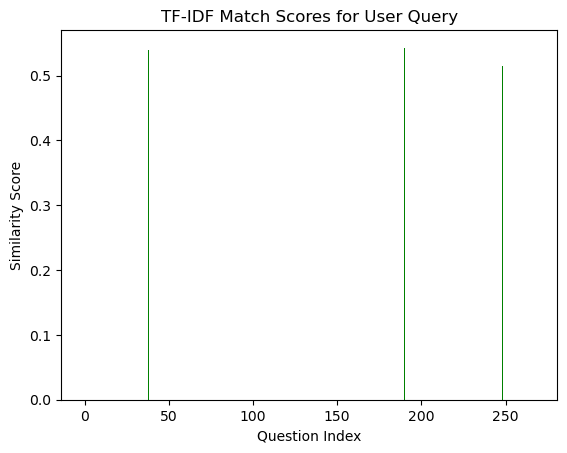

In [5]:
def plot_query_match_scores(user_query, corpus):
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    questions = [q for q, _ in corpus]
    tfidf = TfidfVec.fit_transform(questions + [user_query])  # Add user_query
    vals = cosine_similarity(tfidf[-1], tfidf[:-1]).flatten()  # Match scores

    plt.bar(range(len(vals)), vals, color='green')
    plt.xlabel('Question Index')
    plt.ylabel('Similarity Score')
    plt.title('TF-IDF Match Scores for User Query')
    plt.show()

plot_query_match_scores("What are your services?", faq_corpus)  # Example query


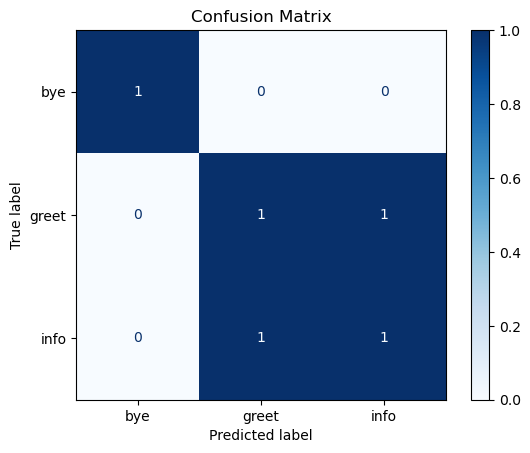

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Example labels and predictions
true_labels = ['greet', 'info', 'bye', 'greet', 'info']
predicted_labels = ['greet', 'info', 'bye', 'info', 'greet']

def plot_confusion_matrix(true_labels, predicted_labels):
    # Convert set to sorted list for consistent ordering
    unique_labels = sorted(set(true_labels + predicted_labels))  
    cm = confusion_matrix(true_labels, predicted_labels, labels=unique_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(true_labels, predicted_labels)


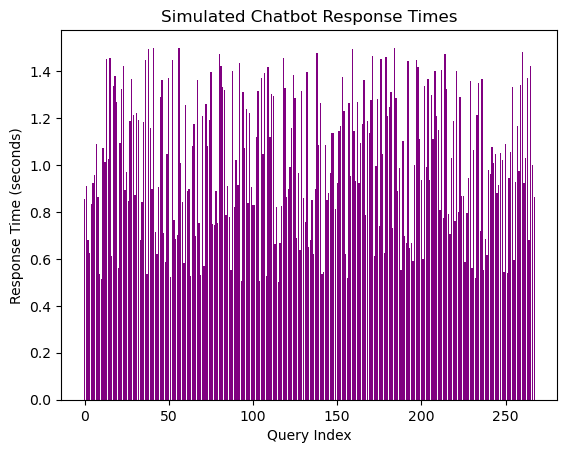

In [7]:
import random

def plot_response_times(corpus):
    response_times = [random.uniform(0.5, 1.5) for _ in range(len(corpus))]
    plt.bar(range(len(response_times)), response_times, color='purple')
    plt.xlabel('Query Index')
    plt.ylabel('Response Time (seconds)')
    plt.title('Simulated Chatbot Response Times')
    plt.show()

plot_response_times(faq_corpus)
